In [32]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [33]:
ds=xr.open_dataset('NPP_VGPM_MODISR18_3x3_2003_2018.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 120, lat: 60, time: 192)
Coordinates:
  * lon      (lon) float64 -178.5 -175.5 -172.5 -169.5 ... 172.5 175.5 178.5
  * lat      (lat) float64 -88.5 -85.5 -82.5 -79.5 -76.5 ... 79.5 82.5 85.5 88.5
  * time     (time) datetime64[ns] 2003-01-16 2003-02-16 ... 2018-12-16
Data variables:
    NPP      (time, lat, lon) float64 ...
Attributes:
    title:         Net Primary Production based on Standard VGPM of Behrenfel...
    Conventions:   CF-1.6
    CreationDate:  2021/11/03 12:45:06

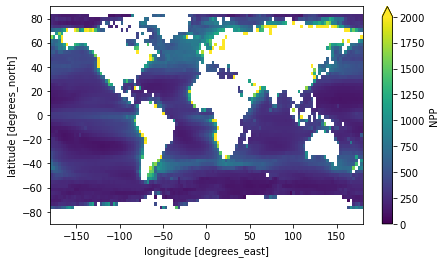

In [34]:
# generate time average (long term mean) and make a quick plot
NPP_mean=ds.NPP.mean(dim='time')
plt.figure(figsize=(7,4))
NPP_mean.plot(vmin=0,vmax=2000)

# save the figure (png and pdf)
#fn='Fig_NPP_ave'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

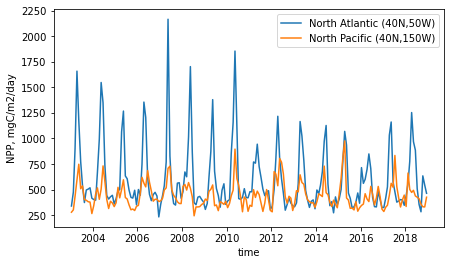

In [35]:
# select a specific location and draw a time series
plt.figure(figsize=(7,4))

# North Atlantic, 40N, 50W
NPP_NA=ds.NPP.sel(lat=40,lon=-50,method="nearest")
plt.plot(ds.time,NPP_NA,label='North Atlantic (40N,50W)')

# North Pacific, 40N 150W
NPP_NP=ds.NPP.sel(lat=40,lon=-150,method="nearest")
plt.plot(ds.time,NPP_NP,label='North Pacific (40N,150W)')

plt.legend()
plt.ylabel('NPP, mgC/m2/day')
plt.xlabel('time')

#fn='Fig_NPP_timeseries'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

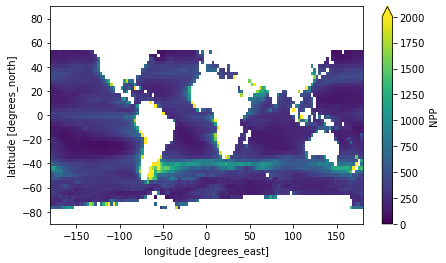

In [36]:
# select a specific month and draw NPP maps
plt.figure(figsize=(7,4))

# calculate January average (from all years)
NPP_jan = ds.NPP.sel(time=ds['time.month']==1).mean(dim='time')

# plot
NPP_jan.plot(vmin=0,vmax=2000)
#fn='Fig_NPP_jan'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()

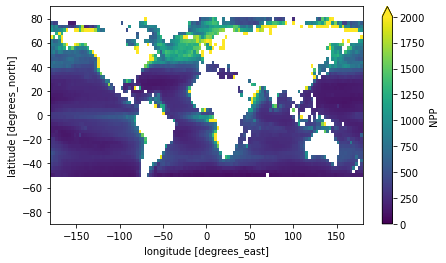

In [37]:
# calculate July average (from all years)
NPP_jul = ds.NPP.sel(time=ds['time.month']==7).mean(dim='time')

plt.figure(figsize=(7,4))
NPP_jul.plot(vmin=0,vmax=2000)
#fn='Fig_NPP_july'
#plt.savefig(fn+'.pdf',bbox_inches="tight")
#plt.savefig(fn+'.png',bbox_inches="tight")
plt.show()